In [1]:
import mysql.connector as connection
import pandas as pd
import numpy as np
import os
import urllib
%matplotlib inline
import matplotlib.pyplot as plt
try:
    mydb = connection.connect(host=os.environ.get("DB_HOST"), database = os.environ.get("DB_NAME"),user=os.environ.get("DB_USER"), passwd=os.environ.get("DB_PASSWORD"),use_pure=True)
    query = "Select * from nba_clean;"
    nba_df = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

In [2]:
import mysql.connector as connection
import pandas as pd
import numpy as np
import os
import urllib
%matplotlib inline
import matplotlib.pyplot as plt
try:
    mydb = connection.connect(host=os.environ.get("DB_HOST"), database = os.environ.get("DB_NAME"),user=os.environ.get("DB_USER"), passwd=os.environ.get("DB_PASSWORD"),use_pure=True)
    query = "Select * from nba_orignal;"
    fantasy_df = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

In [3]:
print(fantasy_df)

     SEASON_ID      PLAYER_NAME TEAM_ABBREVIATION   AGE    GP     W     L  \
0      2014-15     Aaron Gordon               ORL  19.0  47.0  14.0  33.0   
1      2015-16     Aaron Gordon               ORL  20.0  78.0  32.0  46.0   
2      2016-17     Aaron Gordon               ORL  21.0  80.0  29.0  51.0   
3      2017-18     Aaron Gordon               ORL  22.0  58.0  19.0  39.0   
4      2018-19     Aaron Gordon               ORL  23.0  78.0  40.0  38.0   
...        ...              ...               ...   ...   ...   ...   ...   
2797   2021-22  Ziaire Williams               MEM  20.0  62.0  41.0  21.0   
2798   2019-20  Zion Williamson               NOP  19.0  24.0  11.0  13.0   
2799   2020-21  Zion Williamson               NOP  20.0  61.0  29.0  32.0   
2800   2019-20   Zylan Cheatham               NOP  24.0   4.0   2.0   2.0   
2801   2021-22   Zylan Cheatham               UTA  26.0   1.0   0.0   1.0   

      W_PCT          MIN    FGM  ...    TOV   STL   BLK   BLKA     PF    PF

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [5]:
f_df = pd.DataFrame()
df = nba_df['count'] >= 1
nb_df = nba_df[df]
player_names = pd.unique(nb_df[['PLAYER_NAME']].values.ravel())
#i = 0
#leng = len(player_names)
#while i <= leng-1:
for players in player_names:
    filter_data = fantasy_df[fantasy_df['PLAYER_NAME']== players]
    df2 = {'SEASON_ID':'2022-23','PLAYER_NAME':players,'TEAM_ABBREVIATION':filter_data['TEAM_ABBREVIATION'][filter_data.index[-1]],'AGE':(filter_data['AGE'][filter_data.index[-1]]+1)}
    filter_data = filter_data.append(df2, ignore_index = True)
    #print(filter_data)
    #filtered_data = filter_data.drop(['TEAM_ABBREVIATION', 'PLAYER_NAME', 'SEASON_ID'],axis = 1, inplace=True)
    filtered_data = filter_data.iloc[:-1 , :]
    #print(filtered_data)
    stats_list = list(filtered_data)
    #print(stats_list)
    j = 4
    length = len(stats_list)
    #print(players)
    while j <= length-1:
    #for stats in stats_list:
        stat = stats_list[j]
        #print(stat)
        X = filtered_data[['AGE']].values
        #X = X.reshape(1, -1)
        #print(X)
        y = filtered_data[[stat]].values
        #y = y.reshape(1, -1)
        #print(y)
        if len(X) == 1:
            X = np.repeat(X, 2)
            X = X.reshape(-1,1)
            y = np.repeat(y, 2)
            y = y.reshape(-1,1)
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)
        KNR = KNeighborsRegressor(1)
        KNR.fit(x_train,y_train)
        y_pred=KNR.predict(x_test)
        y_pred = y_pred.flatten()
        pred_y_df = pd.DataFrame({"AGE":filter_data['AGE'][filter_data.index[-1]], stat:y_pred})
        pred_y_df[stat]= pred_y_df[stat].round(decimals = 0)
        st = pred_y_df[stat].tolist()
        value = st[0]
        size = len(filter_data)-1
        index = filter_data.columns.get_loc(stat)
        filter_data.iloc[size,index] = value
        j+=1
    last_row = filter_data.tail(1)
    f_df = f_df.append(last_row, ignore_index = True)
    print(players)
    #i+=1
    #print(i)
print(f_df)

Aaron Gordon
Aaron Henry
Aaron Holiday
Aaron Nesmith
Aaron Wiggins
Abdel Nader
Admiral Schofield
Al Horford
Al-Farouq Aminu
Alec Burks
Alekesej Pokusevski
Alex Caruso
Alex Len
Alize Johnson
Alperen Sengun
Amir Coffey
Andre Drummond
Andre Iguodala
Andrew Wiggins
Anfernee Simons
Anthony Davis
Anthony Edwards
Anthony Gill
Anthony Lamb
Armoni Brooks
Arnoldas Kulboka
Austin Reaves
Austin Rivers
Avery Bradley
Ayo Dosunmu
Bam Adebayo
Ben McLemore
Ben Simmons
Blake Griffin
Boban Marjanovic
Bobby Portis
Bogdan Bogdanovic
Bojan Bogdanovic
Bol Bol
Bones Hyland
Bradley Beal
Brandon Boston
Brandon Clarke
Brandon Ingram
Brian Bowen II
Brodric Thomas
Brook Lopez
Bruce Brown
Bruno Fernando
Bryn Forbes
Buddy Hield
CJ Elleby
CJ McCollum
Cade Cunningham
Caleb Martin
Cam Reddish
Cam Thomas
Cameron Johnson
Cameron Oliver
Cameron Payne
Caris LeVert
Carlik Jones
Carmelo Anthony
Cassius Stanley
Cassius Winston
Cedi Osman
Chandler Hutchison
Charles Bassey
Chasson Randle
Chaundee Brown Jr.
Chimezie Metu
Chris B

In [6]:
#f_df.loc[f_df['GP'] >= 83]

,SEASON_ID,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,...,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3


In [7]:
f_df['W_PCT'] = f_df['W'] / f_df['GP']
f_df['W_PCT'] = f_df['W_PCT'].round(decimals = 3)
f_df['FG_PCT'] = f_df['FGM'] / f_df['FGA']
f_df['FG_PCT'] = f_df['FG_PCT'].round(decimals = 3)
f_df['FG3_PCT'] = f_df['FG3M'] / f_df['FG3A']
f_df['FG3_PCT'] = f_df['FG3_PCT'].round(decimals = 3)
f_df['FT_PCT'] = f_df['FTM'] / f_df['FTA']
f_df['FT_PCT'] = f_df['FT_PCT'].round(decimals = 3)
f_df

,SEASON_ID,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,...,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3
0,2022-23,Aaron Gordon,DEN,27.0,75.0,46.0,29.0,0.613,2375.0,434.0,...,133.0,44.0,44.0,52.0,148.0,200.0,1126.0,321.0,6.0,0.0
1,2022-23,Aaron Henry,PHI,23.0,6.0,6.0,0.0,1.000,17.0,1.0,...,2.0,0.0,2.0,2.0,2.0,0.0,2.0,-20.0,0.0,0.0
2,2022-23,Aaron Holiday,PHX,26.0,63.0,34.0,29.0,0.540,1021.0,151.0,...,67.0,42.0,9.0,18.0,92.0,74.0,400.0,-39.0,0.0,0.0
3,2022-23,Aaron Nesmith,BOS,23.0,46.0,22.0,24.0,0.478,669.0,78.0,...,23.0,15.0,9.0,12.0,87.0,29.0,218.0,-7.0,0.0,0.0
4,2022-23,Aaron Wiggins,OKC,24.0,50.0,13.0,37.0,0.260,1209.0,156.0,...,54.0,30.0,10.0,21.0,93.0,63.0,416.0,-235.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,2022-23,Zach LaVine,CHI,28.0,67.0,37.0,30.0,0.552,2328.0,565.0,...,171.0,41.0,23.0,61.0,120.0,266.0,1635.0,-26.0,0.0,0.0
566,2022-23,Zeke Nnaji,DEN,22.0,42.0,30.0,12.0,0.714,397.0,50.0,...,7.0,8.0,4.0,8.0,29.0,15.0,136.0,-82.0,0.0,0.0
567,2022-23,Ziaire Williams,MEM,21.0,62.0,41.0,21.0,0.661,1346.0,191.0,...,41.0,35.0,12.0,17.0,113.0,51.0,501.0,122.0,0.0,0.0
568,2022-23,Zion Williamson,NOP,21.0,24.0,11.0,13.0,0.458,668.0,210.0,...,59.0,16.0,9.0,39.0,42.0,133.0,540.0,62.0,2.0,0.0


In [8]:
col_name = ['GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK','DD2_RANK', 'TD3_RANK']
col_rank = ['GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3']
#print(len(col_name))
#print(len(col_rank))
for (name,rank) in zip(col_name, col_rank):
    f_df[name] = f_df.groupby(['SEASON_ID'])[rank].rank(ascending = False)
    f_df[name] = f_df[name].round(decimals = 0)
print(f_df)

    SEASON_ID      PLAYER_NAME TEAM_ABBREVIATION   AGE    GP     W     L  \
0     2022-23     Aaron Gordon               DEN  27.0  75.0  46.0  29.0   
1     2022-23      Aaron Henry               PHI  23.0   6.0   6.0   0.0   
2     2022-23    Aaron Holiday               PHX  26.0  63.0  34.0  29.0   
3     2022-23    Aaron Nesmith               BOS  23.0  46.0  22.0  24.0   
4     2022-23    Aaron Wiggins               OKC  24.0  50.0  13.0  37.0   
..        ...              ...               ...   ...   ...   ...   ...   
565   2022-23      Zach LaVine               CHI  28.0  67.0  37.0  30.0   
566   2022-23       Zeke Nnaji               DEN  22.0  42.0  30.0  12.0   
567   2022-23  Ziaire Williams               MEM  21.0  62.0  41.0  21.0   
568   2022-23  Zion Williamson               NOP  21.0  24.0  11.0  13.0   
569   2022-23   Zylan Cheatham               UTA  27.0   4.0   2.0   2.0   

     W_PCT     MIN    FGM  ...  TOV_RANK  STL_RANK  BLK_RANK  BLKA_RANK  \
0    0.613  

In [9]:
try:
    mydb = connection.connect(host=os.environ.get("DB_HOST"), database = os.environ.get("DB_NAME"),user=os.environ.get("DB_USER"), passwd=os.environ.get("DB_PASSWORD"),use_pure=True)
    query = "Select * from espn_scoring;"
    espn_df = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

In [10]:
all_names = f_df["PLAYER_NAME"].tolist()
length_n = len(all_names)
print(length_n)
df_repeated = pd.concat([espn_df]*length_n, ignore_index=True)

570


In [11]:
df_repeated["PLAYER_NAME"] = all_names
columns_list = [
                "PLAYER_NAME",
                "GP_ESPN",
                "FGM_ESPN",
                "FGA_ESPN",
                "FTM_ESPN",
                "FTA_ESPN",
                "FG3M_ESPN",
                "REB_ESPN",
                "OREB_ESPN",
                "DREB_ESPN",
                "AST_ESPN",
                "STL_ESPN",
                "BLK_ESPN",
                "TOV_ESPN",
                "PF_ESPN",
                "DD2_ESPN",
                "TD3_ESPN",
                "PTS_ESPN",
                "W_ESPN"
               ]
df_repeated = df_repeated.reindex(columns = columns_list)
#print(df_repeated)

In [12]:
f_df = pd.merge(f_df, df_repeated, how = 'right', on = 'PLAYER_NAME')
f_df

,SEASON_ID,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,...,DREB_ESPN,AST_ESPN,STL_ESPN,BLK_ESPN,TOV_ESPN,PF_ESPN,DD2_ESPN,TD3_ESPN,PTS_ESPN,W_ESPN
0,2022-23,Aaron Gordon,DEN,27.0,75.0,46.0,29.0,0.613,2375.0,434.0,...,0.0,2.0,4.0,4.0,-2.0,0.0,0.0,0.0,1.0,0.0
1,2022-23,Aaron Henry,PHI,23.0,6.0,6.0,0.0,1.000,17.0,1.0,...,0.0,2.0,4.0,4.0,-2.0,0.0,0.0,0.0,1.0,0.0
2,2022-23,Aaron Holiday,PHX,26.0,63.0,34.0,29.0,0.540,1021.0,151.0,...,0.0,2.0,4.0,4.0,-2.0,0.0,0.0,0.0,1.0,0.0
3,2022-23,Aaron Nesmith,BOS,23.0,46.0,22.0,24.0,0.478,669.0,78.0,...,0.0,2.0,4.0,4.0,-2.0,0.0,0.0,0.0,1.0,0.0
4,2022-23,Aaron Wiggins,OKC,24.0,50.0,13.0,37.0,0.260,1209.0,156.0,...,0.0,2.0,4.0,4.0,-2.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,2022-23,Zach LaVine,CHI,28.0,67.0,37.0,30.0,0.552,2328.0,565.0,...,0.0,2.0,4.0,4.0,-2.0,0.0,0.0,0.0,1.0,0.0
566,2022-23,Zeke Nnaji,DEN,22.0,42.0,30.0,12.0,0.714,397.0,50.0,...,0.0,2.0,4.0,4.0,-2.0,0.0,0.0,0.0,1.0,0.0
567,2022-23,Ziaire Williams,MEM,21.0,62.0,41.0,21.0,0.661,1346.0,191.0,...,0.0,2.0,4.0,4.0,-2.0,0.0,0.0,0.0,1.0,0.0
568,2022-23,Zion Williamson,NOP,21.0,24.0,11.0,13.0,0.458,668.0,210.0,...,0.0,2.0,4.0,4.0,-2.0,0.0,0.0,0.0,1.0,0.0


In [13]:
share_columns = ["GP",
                "FGM",
                "FGA",
                "FTM",
                "FTA",
                "FG3M",
                "REB",
                "OREB",
                "DREB",
                "AST",
                "STL",
                "BLK",
                "TOV",
                "PF",
                "DD2",
                "TD3",
                "PTS",
                "W"]
for column in share_columns:
    f_df[column +"_ESPN"] = f_df[column] * f_df[column+"_ESPN"]
print(f_df)

    SEASON_ID      PLAYER_NAME TEAM_ABBREVIATION   AGE    GP     W     L  \
0     2022-23     Aaron Gordon               DEN  27.0  75.0  46.0  29.0   
1     2022-23      Aaron Henry               PHI  23.0   6.0   6.0   0.0   
2     2022-23    Aaron Holiday               PHX  26.0  63.0  34.0  29.0   
3     2022-23    Aaron Nesmith               BOS  23.0  46.0  22.0  24.0   
4     2022-23    Aaron Wiggins               OKC  24.0  50.0  13.0  37.0   
..        ...              ...               ...   ...   ...   ...   ...   
565   2022-23      Zach LaVine               CHI  28.0  67.0  37.0  30.0   
566   2022-23       Zeke Nnaji               DEN  22.0  42.0  30.0  12.0   
567   2022-23  Ziaire Williams               MEM  21.0  62.0  41.0  21.0   
568   2022-23  Zion Williamson               NOP  21.0  24.0  11.0  13.0   
569   2022-23   Zylan Cheatham               UTA  27.0   4.0   2.0   2.0   

     W_PCT     MIN    FGM  ...  DREB_ESPN  AST_ESPN  STL_ESPN  BLK_ESPN  \
0    0.613  

In [14]:
f_df['NET_ESPN'] = f_df['FGM_ESPN'] + f_df['FGA_ESPN'] + f_df['FTM_ESPN'] + f_df["FTA_ESPN"]+ f_df['FG3M_ESPN'] + f_df['REB_ESPN'] + f_df['OREB_ESPN'] + f_df['DREB_ESPN'] + f_df['AST_ESPN'] + f_df['STL_ESPN'] + f_df['BLK_ESPN'] + f_df['TOV_ESPN'] + f_df["PF_ESPN"] + f_df["DD2_ESPN"] + f_df["TD3_ESPN"] + f_df['PTS_ESPN'] + f_df['GP_ESPN'] + f_df['W_ESPN']

In [15]:
f_df['AVG_NET_ESPN'] = f_df['NET_ESPN'] / 82

In [16]:
f_df['PER'] = (f_df['FGM'] * 85.910 + f_df['STL'] * 53.897 + f_df['FG3M'] * 51.757 + f_df['FTM'] * 46.845 + f_df['BLK'] * 39.190 + f_df['OREB'] * 39.190 + f_df['AST'] * 34.677 + f_df['DREB'] * 14.707 - f_df['PF'] * 17.174 - (f_df['FTA'] - f_df['FTM']) * 20.091 - (f_df["FGA"] - f_df["FGM"]) * 39.190 - f_df['TOV'] * 53.897)* (1 / f_df['MIN'])
f_df['PER'] = f_df['PER'].round(decimals = 3)

In [17]:
f_df['PER_RANK'] = f_df.groupby(["SEASON_ID"])["PER"].rank(ascending = False)

In [19]:
f_df['NBA_FANTASY_PTS_RANK_ESPN'] = f_df.groupby(["SEASON_ID"])["AVG_NET_ESPN"].rank(ascending = False)

In [20]:
f_df.sort_values(by = ['NBA_FANTASY_PTS_RANK_ESPN'], inplace = True)


In [21]:
column_espn = list(f_df)
print(column_espn)

['SEASON_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'DD2_RANK', 'TD3_RANK', 'GP_ESPN', 'FGM_ESPN', 'FGA_ESPN', 'FTM_ESPN', 'FTA_ESPN', 'FG3M_ESPN', 'REB_ESPN', 'OREB_ESPN', 'DREB_ESPN', 'AST_ESPN', 'STL_ESPN', 'BLK_ESPN', 'TOV_ESPN', 'PF_ESPN', 'DD2_ESPN', 'TD3_ESPN', 'PTS_ESPN', 'W_ESPN', 'NET_ESPN', 'AVG_NET_ESPN', 'PER', 'PER_RANK', 'NBA_FANTASY_PTS_RANK_ESPN']


In [22]:
f_espn_df = f_df[['SEASON_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE','NET_ESPN', 'AVG_NET_ESPN', 'NBA_FANTASY_PTS_RANK_ESPN']]
stats_df = f_df[['SEASON_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'DD2_RANK', 'TD3_RANK']]

In [23]:
from sqlalchemy import create_engine
from pandas.io import sql
import pymysql
import mysql.connector

In [24]:
mydb = mysql.connector.connect(
  host=os.environ.get("DB_HOST"),
  user=os.environ.get("DB_USER"),
  password=os.environ.get("DB_PASSWORD"),
  database=os.environ.get("DB_NAME")
)

mycursor = mydb.cursor()

sql = "DROP TABLE IF EXISTS espn_pred_KNN"

mycursor.execute(sql)

In [25]:
# Credentials to database connection
hostname=os.environ.get("DB_HOST")
dbname=os.environ.get("DB_NAME")
uname=os.environ.get("DB_USER")
pwd=os.environ.get("DB_PASSWORD")

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))
f_espn_df.to_sql('espn_pred_KNN', engine, index=False)
mydb.close()

<AxesSubplot:xlabel='PLAYER_NAME'>

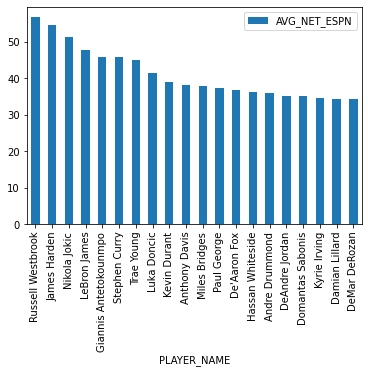

In [26]:
mvp_cutoff = 20
top_mvp_rankings_df = f_df[f_df['NBA_FANTASY_PTS_RANK_ESPN'] <= mvp_cutoff]
top_mvp_rankings_df.plot.bar(x = "PLAYER_NAME", y = "AVG_NET_ESPN")